# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Import the relevant libraries

In [10]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import Logit, add_constant
sns.set()

# this part not be needed after the latests updates of the library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [4]:
raw_data = pd.read_csv('framingham.csv')
raw_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [5]:
# We make sure to create a copy of the data before we start altering it. Note that we don't change the original data we loaded.
data = raw_data.copy()

# Removes the index column that came with the data
#data = data.drop(['Unnamed: 0'], axis = 1)

# We use the map function to change any 'yes' values to 1 and 'no' values to 0. 
#data['y'] = data['y'].map({'yes':1, 'no':0})
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [6]:
# Check the descriptive statistics
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


### Declare the dependent and independent variables

In [7]:
y = data['age']
x1 = data['male']

### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [11]:
y_scaled = (y - y.min()) / (y.max() - y.min())

# Create the model with the rescaled y
x = add_constant(x1)
reg_log = Logit(y_scaled, x)
results_log = reg_log.fit()
# Get the regression summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.688018
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    age   No. Observations:                 4238
Model:                          Logit   Df Residuals:                     4236
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 May 2024   Pseudo R-squ.:                -0.01214
Time:                        13:31:42   Log-Likelihood:                -2915.8
converged:                       True   LL-Null:                       -2880.8
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1264      0.041     -3.103      0.002      -0.206      -0.047
male          -0.0531      0.062     -0.853      0.393      -0.175       0.069
==============================================================================
"""

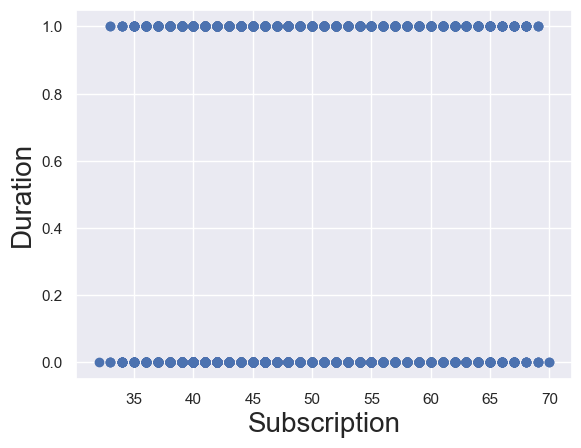

In [13]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
# Create your scatter plot with swapped axes
plt.scatter(y, x1, color='C0')

# Label your axes (swapped accordingly)
plt.xlabel('Subscription', fontsize=20)
plt.ylabel('Duration', fontsize=20)

# Show the plot
plt.show()

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data has two features: 'age' and a binary target variable 'subscribed' (encoded as 0 or 1)

# Extract coefficients from the results (assuming 'const' is the intercept and 'male' is the coefficient for the 'male' feature)
intercept = -0.1264
male_coefficient = -0.0531

# Define a function for the logistic regression line
def logistic_function(age, is_male):
  if is_male:
    # Apply coefficient for 'male' feature
    return 1 / (1 + np.exp(-(intercept + male_coefficient * age)))
  else:
    # No coefficient adjustment for females (coefficient of 0)
    return 1 / (1 + np.exp(-intercept))

# Create age values for the fitted line (more points for smoother visualization)
age_range = np.linspace(min(data['age']), max(data['age']), 100)

# Calculate probability of subscription for each age value (considering male and female)
male_prob = logistic_function(age_range, True)
female_prob = logistic_function(age_range, False)

# Assuming you have a scatter plot of age vs. subscribed (0 or 1) already created
plt.scatter(data['age'], data['subscribed'], color='C0', label='Data')  # Replace 'data' with your actual data structure

# Plot the logistic regression lines for males and females (if applicable)
plt.plot(age_range, male_prob, color='red', label='Male (Logistic)')
plt.plot(age_range, female_prob, color='blue', label='Female (Logistic)')  # Optional line for females

# Label axes and add legend
plt.xlabel('Age', fontsize=20)
plt.ylabel('Probability of Subscription', fontsize=20)
plt.legend()

plt.show()


KeyError: 'subscribed'